<a href="https://colab.research.google.com/github/Siva1729-lila/Ev_vehicle_demand/blob/main/EV_ADAPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("/content/Electric_Vehicle_Population_By_County.csv")
print("Dataset loaded successfully.")


Dataset loaded successfully.


In [ ]:
print("Shape of the dataset:", df.shape)


Shape of the dataset: (20819, 10)


In [ ]:
print(df.dtypes)


Date                                         object
County                                       object
State                                        object
Vehicle Primary Use                          object
Battery Electric Vehicles (BEVs)             object
Plug-In Hybrid Electric Vehicles (PHEVs)     object
Electric Vehicle (EV) Total                  object
Non-Electric Vehicle Total                   object
Total Vehicles                               object
Percent Electric Vehicles                   float64
dtype: object


In [ ]:
print(df.isnull().sum())


Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("Date column converted.")


Date column converted.


In [ ]:
df = df[df['Date'].notnull()]
print("Rows with valid dates:", df.shape[0])


Rows with valid dates: 20819


In [ ]:
df['County'] = df['County'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

print("Missing values filled.")
print(df[['County', 'State']].isnull().sum())


Missing values filled.
County    0
State     0
dtype: int64


In [ ]:
cols_to_convert = [
    'Battery Electric Vehicles (BEVs)',
    'Plug-In Hybrid Electric Vehicles (PHEVs)',
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total',
    'Total Vehicles'
]

for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(",", "")
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Converted object columns to numeric.")


Converted object columns to numeric.


In [ ]:
df = df.dropna(subset=cols_to_convert)
df.reset_index(drop=True, inplace=True)

print("Remaining rows after removing invalid numbers:", df.shape[0])


Remaining rows after removing invalid numbers: 20819


In [ ]:
Q1 = df['Percent Electric Vehicles'].quantile(0.25)
Q3 = df['Percent Electric Vehicles'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Percent Electric Vehicles'] = np.where(
    df['Percent Electric Vehicles'] > upper_bound, upper_bound,
    np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound,
             df['Percent Electric Vehicles'])
)

print("Outliers capped successfully.")


Outliers capped successfully.


In [ ]:
print("Final Data Sample:")
print(df.head())


Final Data Sample:
        Date          County State Vehicle Primary Use  \
0 2022-09-30       Riverside    CA           Passenger   
1 2022-12-31  Prince William    VA           Passenger   
2 2020-01-31          Dakota    MN           Passenger   
3 2022-06-30           Ferry    WA               Truck   
4 2021-07-31         Douglas    CO           Passenger   

   Battery Electric Vehicles (BEVs)  Plug-In Hybrid Electric Vehicles (PHEVs)  \
0                                 7                                         0   
1                                 1                                         2   
2                                 0                                         1   
3                                 0                                         0   
4                                 0                                         1   

   Electric Vehicle (EV) Total  Non-Electric Vehicle Total  Total Vehicles  \
0                            7                         460         

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [6]:
# Convert these columns to numeric type
cols_to_convert = [
    'Battery Electric Vehicles (BEVs)',
    'Plug-In Hybrid Electric Vehicles (PHEVs)',
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total',
    'Total Vehicles',
    'Percent Electric Vehicles'
]

# Remove commas and convert
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(",", "")
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Show summary of numerical columns
df[cols_to_convert].describe()


,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
count,20819.000000,20819.000000,20819.000000,2.081900e+04,2.081900e+04,20819.000000
mean,217.516211,80.063644,297.579855,2.509806e+04,2.539564e+04,4.139216
std,2278.533317,646.373208,2915.504792,1.067324e+05,1.090860e+05,11.055350
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,0.000000,0.000000,1.000000,4.300000e+01,4.400000e+01,0.390000
50%,1.000000,1.000000,1.000000,1.630000e+02,1.650000e+02,1.220000
75%,3.000000,2.000000,4.000000,8.380000e+03,8.421500e+03,2.995000
max,72333.000000,17501.000000,89834.000000,1.399823e+06,1.430937e+06,100.000000


In [7]:
top_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(3)
bottom_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values().head(3)

print("Top 3 Counties with most EVs:\n", top_counties)
print("\nBottom 3 Counties with least EVs:\n", bottom_counties)


Top 3 Counties with most EVs:
 County
King         3309850
Snohomish     683598
Pierce        456003
Name: Electric Vehicle (EV) Total, dtype: int64

Bottom 3 Counties with least EVs:
 County
Brown         1
Union         1
Hood River    1
Name: Electric Vehicle (EV) Total, dtype: int64


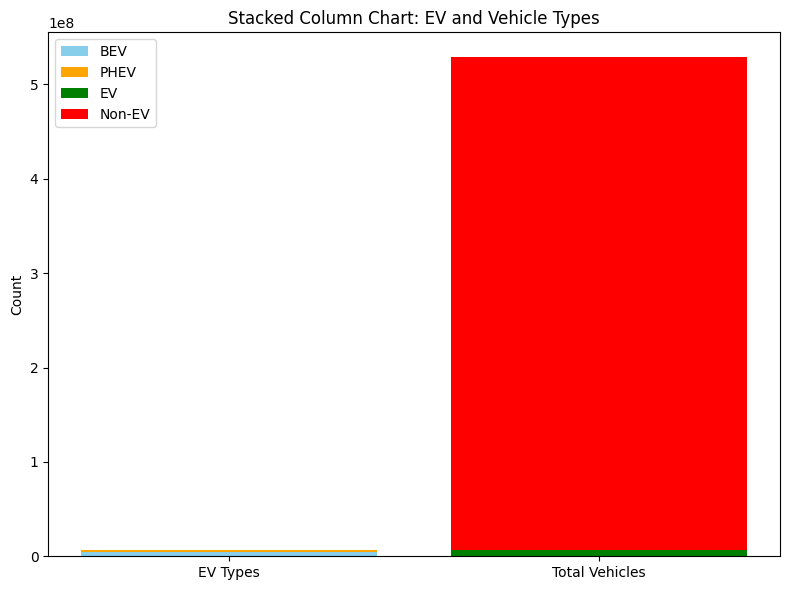

In [10]:
# Get total counts
bev_total = df['Battery Electric Vehicles (BEVs)'].sum()
phev_total = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()
ev_total = df['Electric Vehicle (EV) Total'].sum()
non_ev_total = df['Non-Electric Vehicle Total'].sum()

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# First bar: BEV + PHEV
ax.bar('EV Types', bev_total, label='BEV', color='skyblue')
ax.bar('EV Types', phev_total, bottom=bev_total, label='PHEV', color='orange')

# Second bar: EV + Non-EV
ax.bar('Total Vehicles', ev_total, label='EV', color='green')
ax.bar('Total Vehicles', non_ev_total, bottom=ev_total, label='Non-EV', color='red')

# Labels and title
ax.set_ylabel('Count')
ax.set_title('Stacked Column Chart: EV and Vehicle Types')
ax.legend()
plt.tight_layout()
plt.show()


In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure 'Date' is datetime
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['numeric_date'] = df['year'] * 12 + df['month']

print(df[['Date', 'year', 'month', 'numeric_date']].head())


        Date  year  month  numeric_date
0 2022-09-30  2022      9         24273
1 2022-12-31  2022     12         24276
2 2020-01-31  2020      1         24241
3 2022-06-30  2022      6         24270
4 2021-07-31  2021      7         24259


In [12]:
le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['County'])

print("First 5 encoded counties:\n", df[['County', 'county_encoded']].head())


First 5 encoded counties:
            County  county_encoded
0       Riverside             224
1  Prince William             214
2          Dakota              62
3           Ferry              85
4         Douglas              73


In [13]:
df = df.sort_values(['County', 'Date'])
print("Data sorted by County and Date.")


Data sorted by County and Date.


In [15]:
# 1-month and 3-month percentage change of EV Total (per County)
df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=1, fill_method=None)

df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=3, fill_method=None)


In [16]:
df['months_since_start'] = df.groupby('County').cumcount()


In [17]:
for lag in [1, 2, 3]:
    df[f'ev_total_lag{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)


In [18]:
df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                               .transform(lambda x: x.shift(1).rolling(3).mean())


In [19]:
df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf], np.nan).fillna(0)
df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [20]:
df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()


In [21]:
df['ev_growth_slope'] = df.groupby('County')['cumulative_ev'].transform(
    lambda x: x.rolling(6).apply(lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) == 6 else np.nan)
)


In [22]:
df = df.dropna().reset_index(drop=True)
print("Final cleaned shape:", df.shape)


Final cleaned shape: (19208, 23)


In [23]:
df.to_csv('preprocessed_ev_data.csv', index=False)
print("Preprocessed CSV saved.")


Preprocessed CSV saved.


In [24]:
features = [
    'months_since_start',
    'county_encoded',
    'ev_total_lag1',
    'ev_total_lag2',
    'ev_total_lag3',
    'ev_total_roll_mean_3',
    'ev_total_pct_change_1',
    'ev_total_pct_change_3',
    'ev_growth_slope',
]

target = 'Electric Vehicle (EV) Total'

X = df[features]
y = df[target]

print("X sample:\n", X.head())


X sample:
    months_since_start  county_encoded  ev_total_lag1  ev_total_lag2  \
0                 5.0               0            2.0            2.0   
1                 6.0               0            2.0            2.0   
2                 7.0               0            2.0            2.0   
3                 8.0               0            2.0            2.0   
4                 9.0               0            2.0            2.0   

   ev_total_lag3  ev_total_roll_mean_3  ev_total_pct_change_1  \
0            2.0                   2.0                    0.0   
1            2.0                   2.0                    0.0   
2            2.0                   2.0                    0.0   
3            2.0                   2.0                    0.0   
4            2.0                   2.0                    0.0   

   ev_total_pct_change_3  ev_growth_slope  
0                    0.0         1.857143  
1                    0.0         2.000000  
2                    0.0         2.0000

In [25]:
print("X shape:", X.shape)


X shape: (19208, 9)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (17287, 9)
Test size: (1921, 9)


In [27]:
print(y_test.head())


17287       0
17288    2828
17289       3
17290    2892
17291    2959
Name: Electric Vehicle (EV) Total, dtype: int64
